## <HR>Exploratory Data Analysis(EDA)<HR>

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cartopy.crs as ccrs
from cartopy.io import shapereader

In [2]:
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)

In [3]:
wildfires_train = pd.read_csv('data/wildfires_train.csv', index_col='fire_id', parse_dates=['date'])

In [4]:
wildfires_train['fire_type_name_en'] = wildfires_train.fire_type_name.map(
    json.load(open('data/fire_type_name_en.json','r',encoding='utf-8')),
    na_action='ignore')

In [5]:
wildfires_train.head()

,date,latitude,longitude,fire_type,fire_type_name,fire_type_name_en
fire_id,,,,,,
0,2012-01-01,42.913439,133.887370,4,сжигание порубочных остатков,Burning of felling residues
1,2012-01-01,43.378618,131.772265,3,горение мусора,Garbage Gorenje
2,2012-01-01,42.634134,130.479116,4,сжигание порубочных остатков,Burning of felling residues
3,2012-01-02,43.108370,132.001058,11,не подтверждено,Not confirmed
4,2012-01-02,42.890825,131.337416,4,сжигание порубочных остатков,Burning of felling residues


In [7]:
wildfires_train.dtypes

date                 datetime64[ns]
latitude                    float64
longitude                   float64
fire_type                     int64
fire_type_name               object
fire_type_name_en            object
dtype: object

In [8]:
wildfires_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174871 entries, 0 to 174870
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               174871 non-null  datetime64[ns]
 1   latitude           174871 non-null  float64       
 2   longitude          174871 non-null  float64       
 3   fire_type          174871 non-null  int64         
 4   fire_type_name     174871 non-null  object        
 5   fire_type_name_en  174871 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 9.3+ MB


### Categories Distribution of Wildfire Data

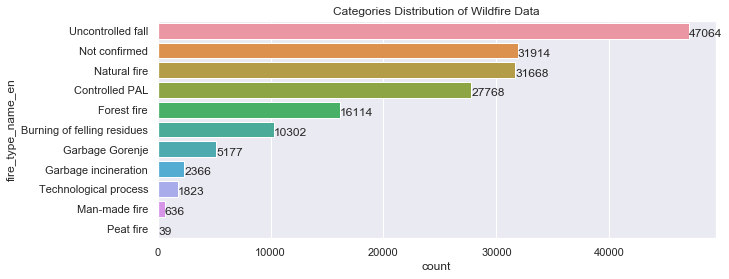

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches((10,4))

ax.set_title("Categories Distribution of Wildfire Data")
ax = sns.countplot(
    y = wildfires_train['fire_type_name_en'], 
    order = wildfires_train['fire_type_name_en'].value_counts().index
)

for p in ax.patches:
    txt = str(p.get_width().round(2)) 
    txt_x,txt_y = p.get_width(), p.get_y()+0.7
    ax.text(txt_x, txt_y,txt)
    
plt.show()

### Distribution of data over the year and month

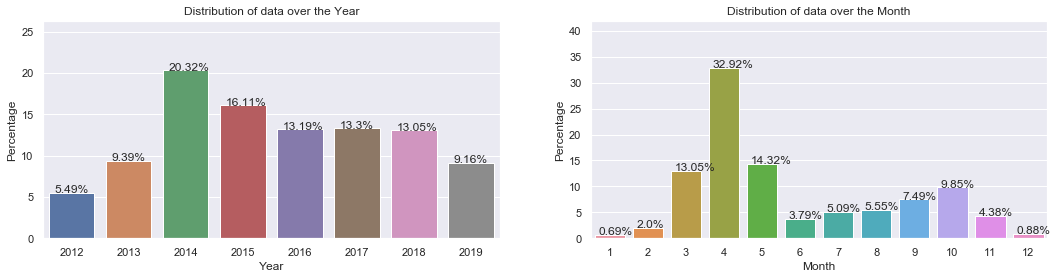

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((18,4))

for i, (title, x) in enumerate([('Year',wildfires_train.date.dt.year),('Month',wildfires_train.date.dt.month)]):
    ax[i].set_title("Distribution of data over the "+title)
    sns.countplot(x = x, ax = ax[i])
    ax[i].set_xlabel(title)
    ax[i].set_ylabel('Percentage')
    norm_fac = len(x)
    ylim = 0
    for p in ax[i].patches:
        p.set_height(p.get_height()*100/norm_fac)
        txt = str(p.get_height().round(2))+'%'
        txt_x,txt_y = p.get_x()+0.1, p.get_height()
        ax[i].text(txt_x, txt_y, txt)
        ylim = max(ylim, p.get_height())+1
    ax[i].set_ylim(0,ylim)
        
plt.show()

### Distribution of fire types each year

In [11]:
#Number of fire incident of each type in each year
df_year = (wildfires_train
        .drop(['latitude','longitude','fire_type','fire_type_name'], axis=1)
        .assign(year=wildfires_train.date.dt.year)
        .groupby(['year','fire_type_name_en'])
        .agg(_count=('year','count'))
    )
df_year 

_count
year fire_type_name_en                  
2012 Burning of felling residues    1062
     Controlled PAL                  166
     Forest fire                    3670
     Garbage Gorenje                 266
     Garbage incineration            138
     Man-made fire                    25
     Natural fire                   1445
     Not confirmed                  1281
     Peat fire                         5
     Technological process           280
     Uncontrolled fall              1255
2013 Burning of felling residues    1279
     Controlled PAL                 3511
     Forest fire                    1380
     Garbage Gorenje                 324
     Garbage incineration            260
     Man-made fire                    74
     Natural fire                   2170
     Not confirmed                  3509
     Peat fire                         7
     Technological process           219
     Uncontrolled fall              3685
2014 Burning of felling residues    1677
     Controlled PAL                 4710
     Forest fire                    2346
     Garbage Gorenje                 922
     Garbage incineration            460
     Man-made fire                   124
     Natural fire                   4741
     Not confirmed                  8479
     Peat fire                        13
     Technological process           266
     Uncontrolled fall             11792
2015 Burning of felling residues    1552
     Controlled PAL                 3661
     Forest fire                    2274
     Garbage Gorenje                 956
     Garbage incineration            375
     Man-made fire                    93
     Natural fire                   4909
     Not confirmed                  5894
     Peat fire                         6
     Technological process           186
     Uncontrolled fall              8273
2016 Burning of felling residues    1075
     Controlled PAL                 2555
     Forest fire                    2316
     Garbage Gorenje                 784
     Garbage incineration            347
     Man-made fire                   103
     Natural fire                   4368
     Not confirmed                  4181
     Peat fire                         4
     Technological process           357
     Uncontrolled fall              6980
2017 Burning of felling residues    1460
     Controlled PAL                 5201
     Forest fire                    1789
     Garbage Gorenje                 817
     Garbage incineration            285
     Man-made fire                    75
     Natural fire                   4137
     Not confirmed                  3200
     Peat fire                         4
     Technological process           185
     Uncontrolled fall              6097
2018 Burning of felling residues    1588
     Controlled PAL                 5212
     Forest fire                    1994
     Garbage Gorenje                 867
     Garbage incineration            300
     Man-made fire                    76
     Natural fire                   5047
     Not confirmed                  2716
     Technological process           276
     Uncontrolled fall              4744
2019 Burning of felling residues     609
     Controlled PAL                 2752
     Forest fire                     345
     Garbage Gorenje                 241
     Garbage incineration            201
     Man-made fire                    66
     Natural fire                   4851
     Not confirmed                  2654
     Technological process            54
     Uncontrolled fall              4238

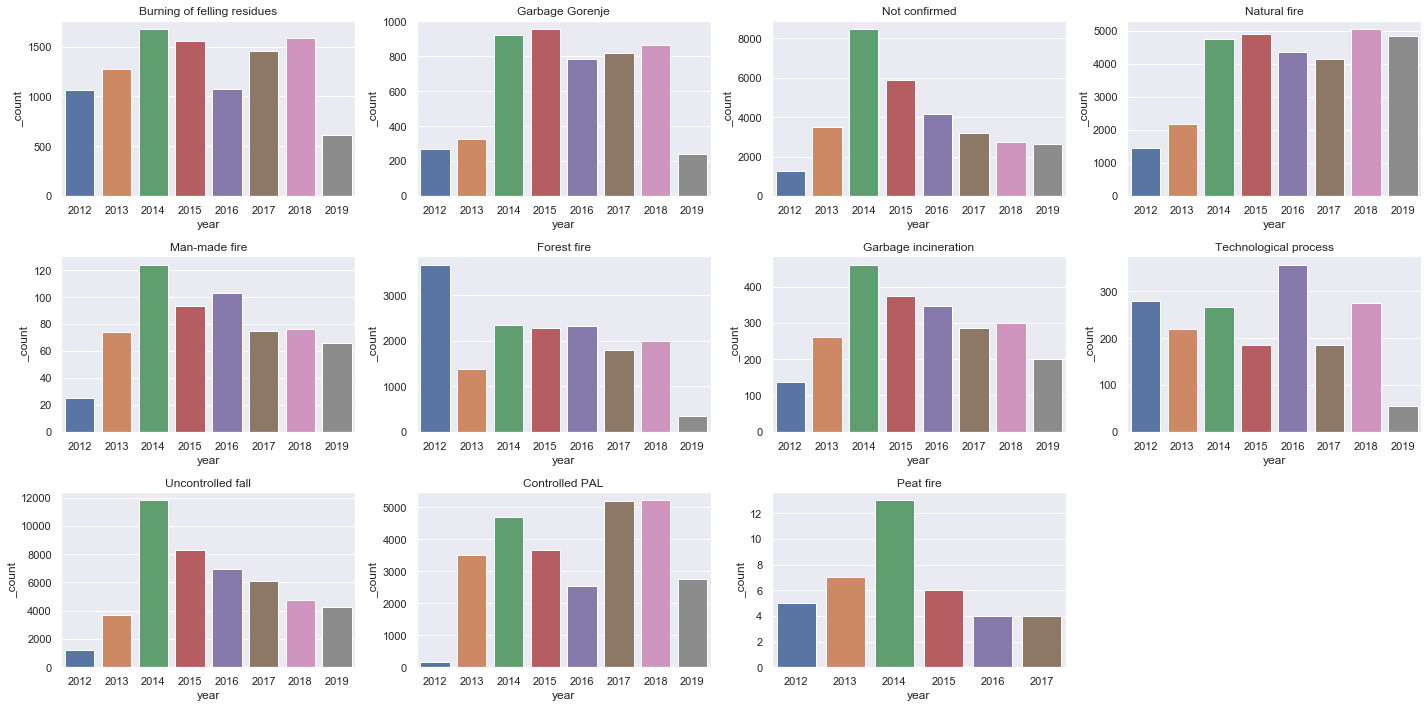

In [12]:
fig = plt.figure(figsize=(20,10))
for i, fire_type_name_en in enumerate(wildfires_train['fire_type_name_en'].unique()):
    sample = df_year.query("fire_type_name_en == @fire_type_name_en").droplevel(1, axis=0)
    ax = plt.subplot(3,4,i+1)
    sns.barplot(x = sample.index, y = sample._count)
    ax.set_title(fire_type_name_en)
fig.tight_layout()

### Distribution of fire types each month

In [13]:
#Number of fire incident of each type in each month
df_month = (wildfires_train
        .drop(['latitude','longitude','fire_type','fire_type_name'], axis=1)
        .assign(month=wildfires_train.date.dt.month)
        .groupby(['month','fire_type_name_en'])
        .agg(_count=('month','count'))
    )
df_month

_count
month fire_type_name_en                  
1     Burning of felling residues     329
      Controlled PAL                   91
      Forest fire                       9
      Garbage Gorenje                  72
      Garbage incineration             68
      Man-made fire                    26
      Natural fire                     21
      Not confirmed                   164
      Technological process           113
      Uncontrolled fall               310
2     Burning of felling residues     463
      Controlled PAL                  398
      Forest fire                      27
      Garbage Gorenje                 142
      Garbage incineration             84
      Man-made fire                    27
      Natural fire                    485
      Not confirmed                   793
      Technological process            81
      Uncontrolled fall               996
3     Burning of felling residues    1732
      Controlled PAL                 7626
      Forest fire                     249
      Garbage Gorenje                 497
      Garbage incineration            283
      Man-made fire                    36
      Natural fire                   3500
      Not confirmed                  3444
      Peat fire                         3
      Technological process           116
      Uncontrolled fall              5339
4     Burning of felling residues    1075
      Controlled PAL                10278
      Forest fire                    2632
      Garbage Gorenje                 796
      Garbage incineration            529
      Man-made fire                   182
      Natural fire                  12611
      Not confirmed                  9914
      Peat fire                         1
      Technological process           138
      Uncontrolled fall             19406
5     Burning of felling residues     248
      Controlled PAL                 1413
      Forest fire                    4100
      Garbage Gorenje                 455
      Garbage incineration            259
      Man-made fire                   100
      Natural fire                   4078
      Not confirmed                  3401
      Peat fire                         1
      Technological process           133
      Uncontrolled fall             10853
6     Burning of felling residues      81
      Controlled PAL                  571
      Forest fire                    3108
      Garbage Gorenje                 190
      Garbage incineration             73
      Man-made fire                    35
      Natural fire                    658
      Not confirmed                   845
      Peat fire                         5
      Technological process           147
      Uncontrolled fall               916
7     Burning of felling residues      64
      Controlled PAL                  905
      Forest fire                    3346
      Garbage Gorenje                 272
      Garbage incineration             66
      Man-made fire                    27
      Natural fire                   1396
      Not confirmed                  1644
      Peat fire                        15
      Technological process           220
      Uncontrolled fall               938
8     Burning of felling residues      94
      Controlled PAL                  844
      Forest fire                    1425
      Garbage Gorenje                 503
      Garbage incineration            100
      Man-made fire                    32
      Natural fire                   2443
      Not confirmed                  3075
      Peat fire                         3
      Technological process           136
      Uncontrolled fall              1043
9     Burning of felling residues    1124
      Controlled PAL                 2254
      Forest fire                     850
      Garbage Gorenje                 815
      Garbage incineration            194
      Man-made fire                    44
      Natural fire                   2246
      Not confirmed                  3360
   

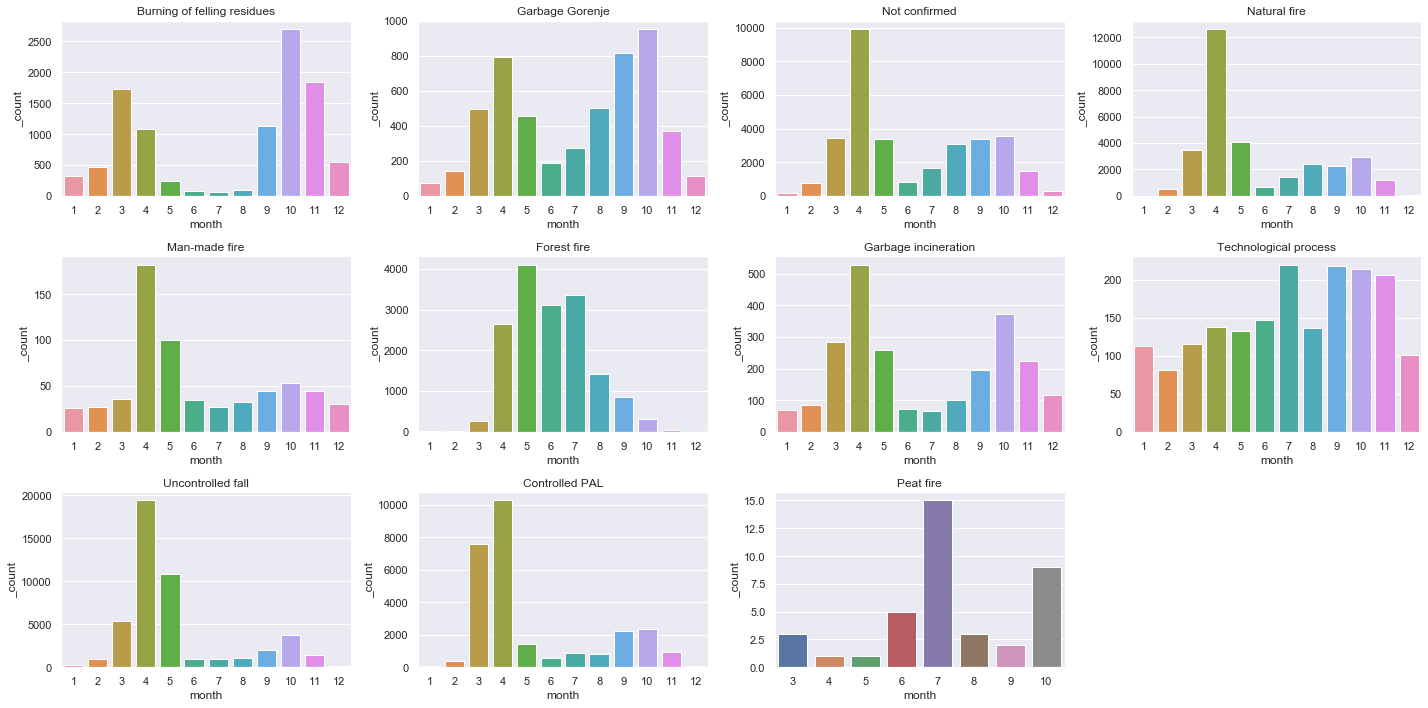

In [14]:
fig = plt.figure(figsize=(20,10))
for i, fire_type_name_en in enumerate(wildfires_train['fire_type_name_en'].unique()):
    sample = df_month.query("fire_type_name_en == @fire_type_name_en").droplevel(1, axis=0)
    ax = plt.subplot(3,4,i+1)
    sns.barplot(x = sample.index, y = sample._count)
    ax.set_title(fire_type_name_en)
fig.tight_layout()

### Distribution of number of fire incident in a month each year

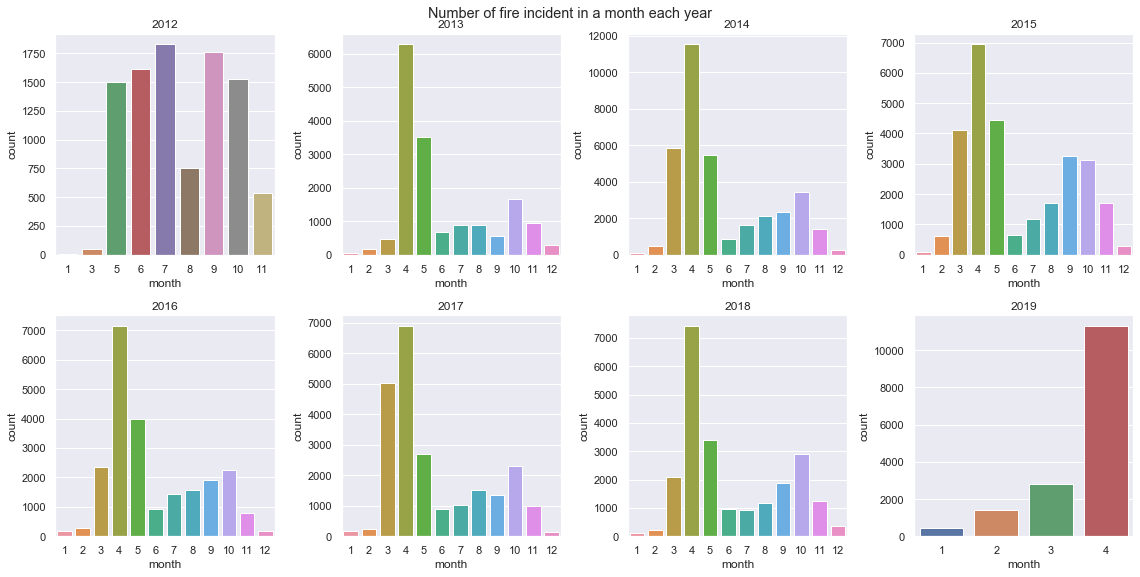

In [20]:
fig = plt.figure(figsize=(16,8))
for year in range(2012,2020):
    plt.subplot(2,4,year-2011)
    sample = (wildfires_train
                .assign(year=wildfires_train.date.dt.year)
                .assign(month=wildfires_train.date.dt.month)
                .query("year==@year"))
    sns.countplot(x = sample.month)
    plt.title(year)

plt.suptitle('Number of fire incident in a month each year',x=0.5,y=1)
fig.tight_layout()

### Distribution of number of fire incident in year each month

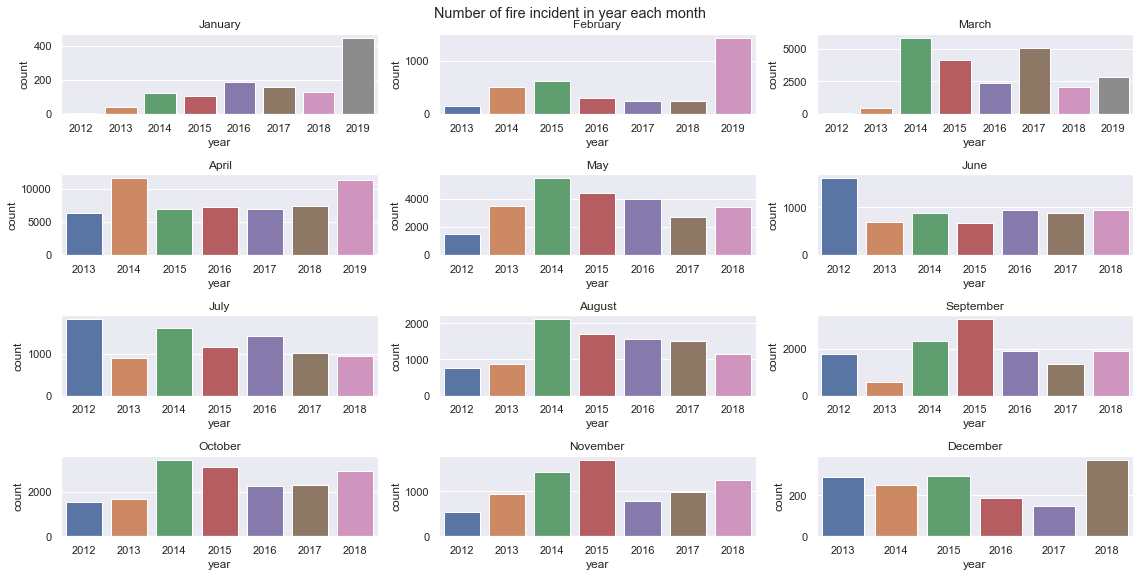

In [21]:
fig = plt.figure(figsize=(16,8))
for month in range(1, 13):
    plt.subplot(4,3,month)
    sample = (wildfires_train
                .assign(year=wildfires_train.date.dt.year)
                .assign(month=wildfires_train.date.dt.month)
                .query("month==@month"))
    sns.countplot(x = sample.year)
    plt.title(sample.iloc[0].date.month_name())

plt.suptitle('Number of fire incident in year each month',x=0.5,y=1)
fig.tight_layout()

## 2. Geographical Data

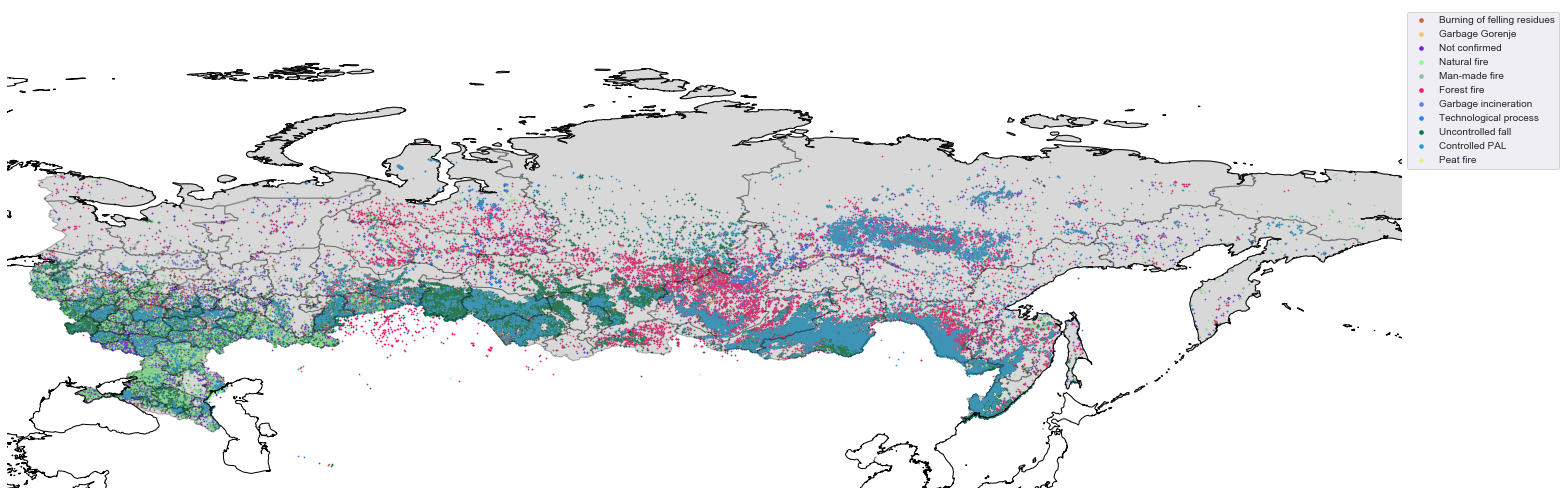

In [17]:
fig = plt.figure(figsize=(25,20))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([25,179,82,35],crs=ccrs.Geodetic())
ax.coastlines(resolution='10m')
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

#add the provinces of Russia in map
kw = dict(resolution='10m', category='cultural', name='admin_1_states_provinces')
states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)
for record, state in zip(shp.records(), shp.geometries()):
    if record.attributes['admin'] == 'Russia':
        ax.add_geometries([state], ccrs.PlateCarree(), edgecolor='black', facecolor='gray', alpha=0.3)

random.seed(0)
colors = dict((fire_type,"#"+''.join(random.sample('0123456789ABCDEF',6))) 
           for fire_type in wildfires_train.fire_type_name_en.unique())

for fire_type in wildfires_train.fire_type_name_en.unique():
    sample = wildfires_train[wildfires_train.fire_type_name_en==fire_type]
    ax.scatter(
        sample['longitude'], sample['latitude'],
        linewidth=1, marker='o', s=0.5, alpha=1.0, 
        color=colors[fire_type],
        label=fire_type,
        transform=ccrs.Geodetic()
    )
    
ax.figure.legend(
    bbox_to_anchor = (1.,1),
    loc = 2, 
    bbox_transform = ax.transAxes,
    prop = {'size': 10},
    markerscale = 5.0
)

plt.show()

In [18]:
def plotMap(ax, sample, fire_type_name_en):
    ax.set_extent([25,179,82,35],crs=ccrs.PlateCarree())
    ax.coastlines(resolution='110m')
    #add the provinces of Russia in map
    kw = dict(resolution='10m', category='cultural', name='admin_1_states_provinces')
    states_shp = shapereader.natural_earth(**kw)
    shp = shapereader.Reader(states_shp)
    for record, state in zip(shp.records(), shp.geometries()):
        if record.attributes['admin'] == 'Russia':
            ax.add_geometries([state], ccrs.PlateCarree(), edgecolor='black', facecolor='gray', alpha=0.3)
    ax.scatter(
        sample['longitude'], sample['latitude'],
        linewidth=1, marker='o', s=0.1, alpha=0.8, 
        label=fire_type,
        transform=ccrs.Geodetic()
    )
    ax.set_title(fire_type_name_en)

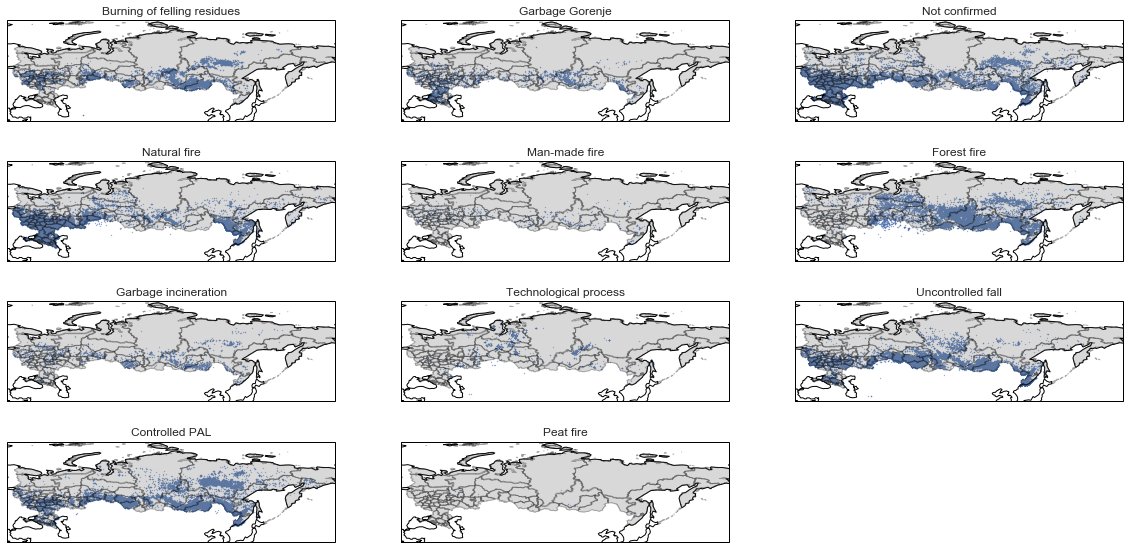

In [19]:
fig=plt.figure(figsize=(20,25))
for i, fire_type_name_en in enumerate(wildfires_train.fire_type_name_en.unique()):
    ax = plt.subplot(4, 3, i+1, projection=ccrs.PlateCarree())
    sample = wildfires_train[wildfires_train.fire_type_name_en==fire_type_name_en]
    plotMap(ax, sample, fire_type_name_en)
plt.subplots_adjust(bottom=0.001, right=0.9, top=0.3)
plt.show()